[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding
This notebook runs two different IPP... experiments.

The first one, implemented in `image_IPP.py` is a simple IPP... video codec without RDO (all macro-blocks are motion compensated as P-type blocks). The lossy image compressor is MP4 used in intra mode.

`image_IPP_adaptive.py`

The second one, implemented in `image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 

Finally, the RD curves are compared to MP4 (intra-mode).

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Sequence to compress

In [2]:
#sequence = "bus"
sequence = "akiyo"

!../sequences/$sequence/runme.sh

### Number of frames to compress

In [3]:
N_frames = 5 # Min val 3

## Testing `image_IPP`

### Select `image_IPP` in `RD_curve.py`

In [4]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [5]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


### We use MP4 and therefore, no previous spatial transform is used
MP4 uses the DCT.

In [6]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [7]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


### Select the color transform

In [8]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [9]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


### Run the codec

In [10]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

rm: cannot remove '/tmp/*.png': No such file or directory
akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame 

In [53]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???

In [54]:
!grep BPP /tmp/output_image_IPP | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [55]:
!cat /tmp/image_IPP.txt

0.05425084175084175	42.22226036405724
0.05432449494949495	42.56665154145623
0.054313973063973064	42.74200205176768
0.05425610269360269	42.77778501157407
0.054282407407407404	42.80607901936027
0.05425610269360269	42.843977535774414
0.05425610269360269	42.880486505681816


In [56]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`

### Select `image_IPP_adaptive` in `RD_curve.py`

In [57]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [58]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [59]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [60]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [61]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [62]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [63]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [64]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_adaptive >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751511037349701 -0.4026305377483368
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.2449876368045807 -0.2870011329650879
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.388182133436203 -0.8962959051132202
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py

In [65]:
!grep BPP /tmp/output_image_IPP_adaptive | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [66]:
!cat /tmp/image_IPP_adaptive.txt

0.05742319023569023	31.189213094486536
0.05209385521885522	35.426301425715494
0.04781670875420876	41.79038628472222
0.04396043771043771	49.35568970959596
0.04116161616161616	55.042709648569016
0.03781039562289563	61.86492134890572
0.03541140572390573	70.53083701599326


In [67]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` in `RD_curve.py`

In [68]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as codec\n/\nimport MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [69]:
!grep import RD_curve.py

#import debug
import config
import distortion
import image_3 as frame
#import image_interpolated_IPP as codec
#import image_IPP as codec
#import image_IPP_adaptive as codec
#import image_IPP_quantized_prediction as codec
#import image_IPP_quantized_residue as codec
import MP4 as codec
#import IPP_compressor as codec
import logging
import argparse


In [70]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [71]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [72]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [73]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [74]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [75]:
!python RD_curve.py --N_frames=$N_frames 1> >(tee /tmp/output_MP4 >&1) | grep BPP | grep Average | cat -n

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

frame=    5 fps=0.0 q=29.0 Lsize=       8kB time=00:00:00.16 bitrate= 384.0kbits/s speed=   2x    
video:7kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 13.001912%
[libx264 @ 0x55b63d23bd40] frame I:1     Avg QP:25.35  size:  5924
[libx264 @ 0x55b63d23bd40] frame P:4     Avg QP:28.09  size:    63
[libx264 @ 0x55b63d23bd40] mb I  I16..4: 19.2% 51.8% 29.0%
[libx264 @ 0x55b63d23bd40] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  2.5%  1.1%  0.4%  0.0%  0.0%    skip:96.0%
[libx264 @ 0x55b63d23bd40] 8x8 transform intra:51.8% inter:68.8%
[libx264 @ 0x55b63d23bd40] coded y,u,v intra: 59.5% 25.0% 20.1% inter: 0.2% 0.0% 0.0%
[libx264 @ 0x55b63d23bd40] i16 v,h,dc,p: 39% 42%  3% 16%
[libx264 @ 0x55b63d23bd40] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 28% 24% 14%  4%  6%  7%  5%  7%  5%
[libx264 @ 0x55b63d23bd40] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 30% 19% 15%  4%  5%  9%  5%  8%  4%
[libx264 @ 0x55b63d23bd40] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55b63d23bd40] ref P L0: 82.4

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed=0.972x    
video:543kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enab

frame=    5 fps=0.0 q=41.0 Lsize=       3kB time=00:00:00.16 bitrate= 178.1kbits/s speed=2.19x    
video:3kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 33.034714%
[libx264 @ 0x55ef349fbd40] frame I:1     Avg QP:37.73  size:  1928
[libx264 @ 0x55ef349fbd40] frame P:4     Avg QP:39.53  size:    32
[libx264 @ 0x55ef349fbd40] mb I  I16..4: 20.5% 68.9% 10.6%
[libx264 @ 0x55ef349fbd40] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  3.2%  0.0%  0.0%  0.0%  0.0%    skip:96.8%
[libx264 @ 0x55ef349fbd40] 8x8 transform intra:68.9% inter:100.0%
[libx264 @ 0x55ef349fbd40] coded y,u,v intra: 29.8% 11.9% 8.8% inter: 0.0% 0.0% 0.0%
[libx264 @ 0x55ef349fbd40] i16 v,h,dc,p: 42% 31% 15% 12%
[libx264 @ 0x55ef349fbd40] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 34% 25% 18%  3%  3%  5%  2%  6%  4%
[libx264 @ 0x55ef349fbd40] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 38% 18% 13%  7%  6%  7%  4%  4%  3%
[libx264 @ 0x55ef349fbd40] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55ef349fbd40] kb/s:82.24
ffm

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

In [76]:
!grep BPP /tmp/output_MP4 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [77]:
!cat /tmp/MP4.txt

0.0526199494949495	10.227355587121213
0.04041982323232323	14.271014178240742
0.03232323232323232	20.01470367739899
0.026557239057239057	28.018473800505053
0.022132786195286195	40.35029263994108
0.01875	58.18308606902357
0.016303661616161615	83.56751367845118


In [78]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

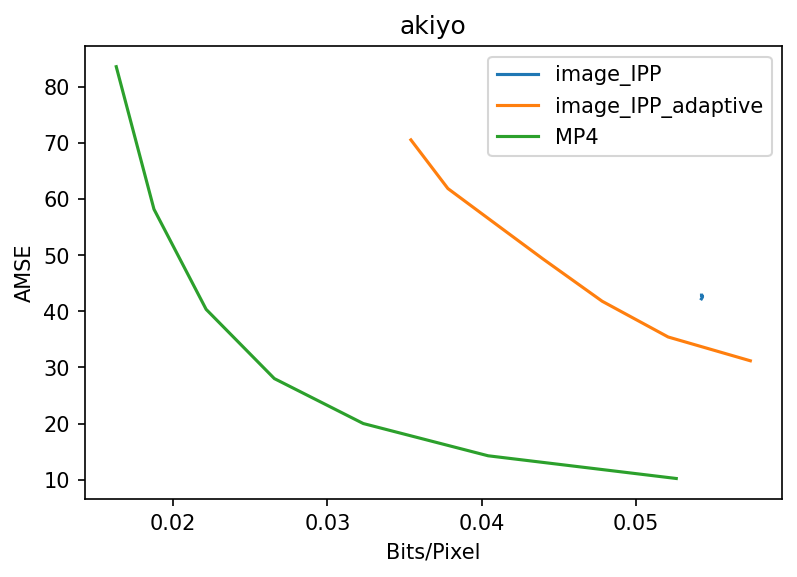

In [79]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

## Testing `image_IPP_quantized_residue`

### Select `image_IPP_quantized_residue` in `RD_curve.py`

In [80]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [39]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [40]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [41]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [42]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [43]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [44]:
# You can see in real-time the output by running "tail -f /tmp/output"
!rm /tmp/*.png
!../sequences/$sequence/runme.sh
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_quantized_residue >&1) | grep BPP | grep Average | cat -n

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [45]:
!grep BPP /tmp/output_image_IPP_quantized_residue | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [46]:
!cat /tmp/image_IPP_quantized_residue.txt

In [47]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

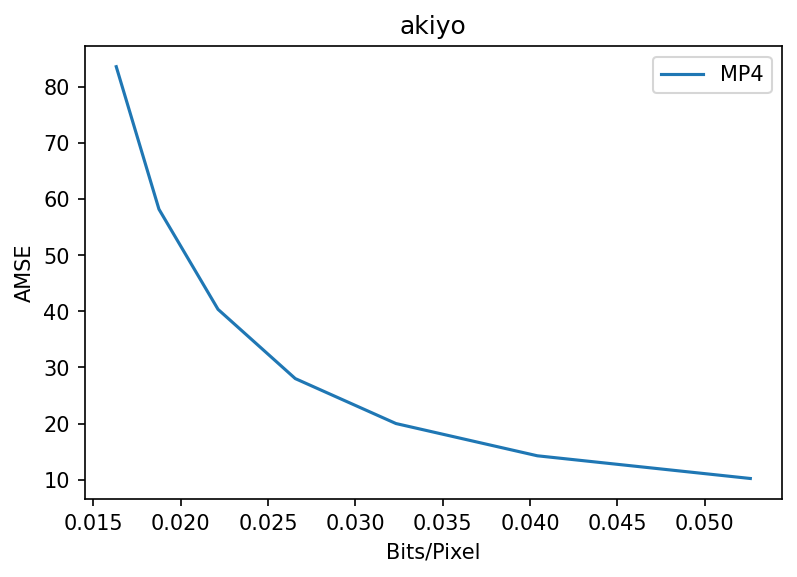

In [48]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

In [49]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

NameError: name 'RD_points_no_intrablocks' is not defined

<Figure size 900x600 with 0 Axes>